# CIS 9
# Supervised Learning: Regression 

`Optional Reading`
<br>Think Stats: Correlation (Chapter 9)
- 9.1 to 9.4
- 9.7 to 9.8

Python Data Handbook Chapter 5: Linear Regression
- Simple Linear Regression

- A regression, or regression predictive modeling, is the task of approximating a mapping function _f_  from a set of input features _X_  to some output labels _y_, such that when a new set of X features is presented, the function f can accurately predict the outcome y.
- When the function f is a linear function, then it is a linear regression. 
- In a linear regression problem, the features X are the _independent variables_ and the labels _y_ are the _dependent variable_ because they're dependent on X.
- The output y is quantitative data, a number that denotes a quantity such as a size or an amount within a range of values.
- A regression with 1 variable X is a simple regression problem.
A regression with 2 or more variables X1, X2... is a multiple regression problem.
- There are other regression models that can be used when the relationship between X and y are not linear. One example is a decision tree regression model, which uses training data to build a tree structure to predict the output of new data.

### Simple linear regression

We start with a small dataset of package delivery time data ([source](https://www.kaggle.com/gaurav9712/delivery-time)). The dataset has 2 columns of data: the sorting time and the delivery time. The sorting time is the time it takes to send the package out to delivery, and the delivery time is the time from when the package leaves the warehouse to the time it reaches the destination.
<br>We want to see if we can predict the delivery time based on the sorting time. The sorting time is the X input, and the delivery time is the y output.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

1. Read data from `delivery.csv` into a DataFrame. Inpect the data by printing the number of rows and columns of the DataFrame, and print the first 5 lines of the DataFrame.

In [44]:
d = pd.read_csv('delivery.csv')
print(d.shape)
d.head()

(21, 2)


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


2. Check whether there is any correlation between the sorting time and delivery time
<br>Recall that a scatterplot can show correlation.

Text(0, 0.5, 'Delivery time')

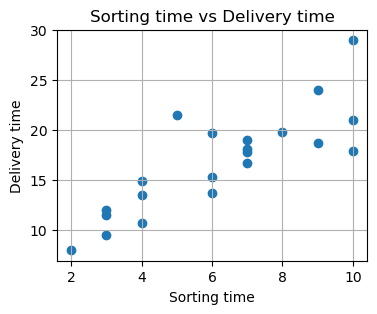

In [58]:
# a. Start by shortening the column labels to Delivery and Sorting
d.columns=['Delivery','Sorting']
# b. plot the data to check correlation
plt.figure(figsize=(4,3))
plt.grid()
plt.scatter(d.Sorting,d.Delivery)    
plt.title("Sorting time vs Delivery time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

3. It looks like there is correlation, as the sorting time increases, the delivery time also increases. This means we can probably use linear regression as an estimator.
<br>Create the linear regression estimator

In [46]:
import sklearn.linear_model as lm

regr = lm.LinearRegression()

4. From the dataset, create the X DataFrame with the Sorting column, and create the y Series with the Delivery column

In [47]:
X = d.drop(columns=['Delivery'])
y = d.Delivery

5. Train the estimator

In [48]:
regr = regr.fit(X, y)

6. Print the _coefficients_ (the m value or the slope) and the _intercepts_ (the b value) of y = mx + b

In [49]:
print('Coefficients:', regr.coef_)
print('Intercepts:', regr.intercept_)

Coefficients: [1.6490199]
Intercepts: 6.58273397199706


7. With the coefficient and intercept values, plot the linear regression line that fits the scatter plot

Text(0, 0.5, 'Delivery time')

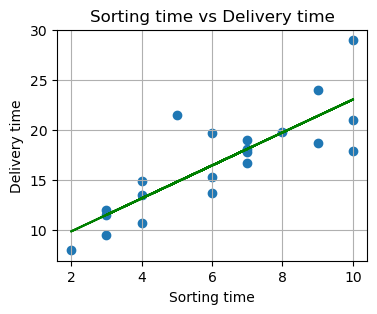

In [59]:
plt.figure(figsize=(4,3))
plt.grid()
plt.plot(X.Sorting, regr.coef_ * X.Sorting + regr.intercept_, color='green')
plt.scatter(d.Sorting,d.Delivery)    
plt.title("Sorting time vs Delivery time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

8. Theoretically we can now predict the delivery time, given the sorting time of a package

In [60]:
# manually input an X value, then calculate y = mx + b
s_time = 12
d_time = regr.coef_ * s_time + regr.intercept_
print(d_time)

[26.37097273]


In [10]:
# Or, to use the model's predict() function
regr = regr.fit(X.values, y.values)
regr.predict([[12.0]])

array([26.37097273])

9. But is the prediction any good? Does the model work well for this type of data?
<br>It's common practice to take the set of data and break it up into 2 parts: training data and test data. This way we have multiple test data to test the estimator. We use the training data to train the estimator, and then use the test data to check the output.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15, 1) (6, 1) (15,) (6,)


10. Use the test data as input, then observe the predicted output with the actual data

In [62]:
y_pred = regr.predict(X_test)
# Since this is a small dataset, we can use a DataFrame to visually compare 
# each actual output and predicted output
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9,18.75,21.423913
15,14.88,13.178814
6,19.00,18.125873
13,11.50,11.529794
4,29.00,23.072933
16,13.75,16.476853


11. The actual and predicted data are not expected to be identical, but the closer they are the better our estimator is working. There are some common measurements of how well the estimator works:
- The root mean squared error, abbreviated as RMSE
- The R-squared value

In [63]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
deliveryMean = np.mean(d.Delivery)
print('Root Mean Squared Error:',round(RMSE,2), "or", round(RMSE/deliveryMean*100), "percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 2.98 or 18 percent error
R^2 value: 0.68


The RMSE is the square root of the mean of squared errors, where error is the difference between actual and predicted data points. It is the standard deviation of the difference between predicted data and actual data. A lower RSME is a better fit, but keep in mind that this is not an absolute value. It is a value which is compared with the range of y values to determine whether it's a small or large value. 

Another common measurement of how well the estimator works for a type of data is the $R^{2}$ value or the _coefficient of determination_. It is a percentage of the y labels that are explained by the X features. An $R^{2}$ value of 1.0 (100%) is a perfect fit, and a value of 0.0 (0%) means there is no fit. An $R^{2}$ value of 0.85 means that the X features can predict 85% of the y output.

Depending on the data that we work with, sometimes a low R value is acceptable if there are other significant trends. Likewise, a high R value doesn't necessarily mean the estimator is good. If the differences between actual data and the linear regression line mostly cancel each other out (such as +22.5 and -22.5) then the R value can be high and yet the difference (22.5) could be large compared to the mean of the data.

__More examples of simple linear regression__

We look at the data in `marketing.csv` ([source](https://www.kaggle.com/fayejavad/marketing-linear-multiple-regression)). The data are 3 marketing budgets and the corresponding sales figures, in thousands of dollars.

13. Read data from `marketing.csv`, show the size of the data and the first 5 lines of data

In [65]:
d = pd.read_csv('marketing.csv')
print(d.shape)
d.head()

(171, 4)


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


We want to see if marketing the product on each of the 3 platforms have a direct effect on the sales figures.
<br>First we look at youtube.

14. Create a plot to see the correlation between the youtube and sales data

Text(0, 0.5, 'sales')

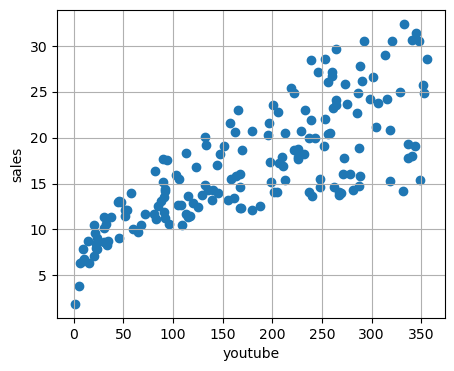

In [68]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.youtube,d.sales)
plt.xlabel('youtube')
plt.ylabel('sales')

15. Create the X and y variables, split the data into training and test sets, train the estimator, and print the RMSE and R squared values.

In [69]:
# youtube
X = d.youtube.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
salesMean = np.mean(d.sales)
print('Root Mean Squared Error:',round(RMSE,2), "or", round(RMSE/salesMean*100), "percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 4.0 or 24 percent error
R^2 value: 0.61


16. Plot the linear regression line to show the fit

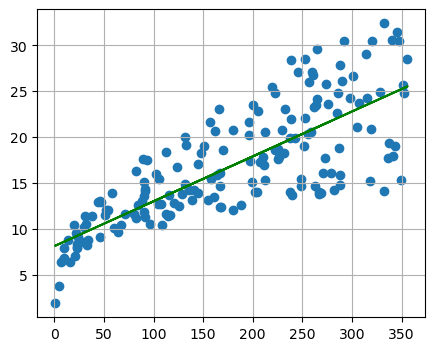

In [70]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.youtube,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_, color='green')

17. Do the same 3 steps for facebook data: show the correlation, show how well the estimator works, show the fit

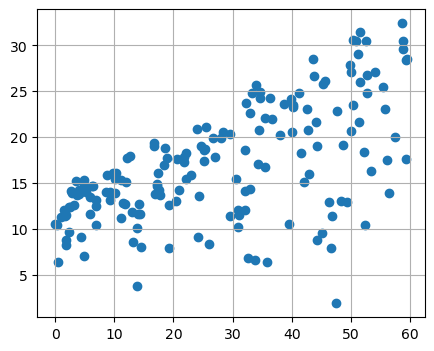

In [71]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.facebook,d.sales) 

In [72]:
# facebook
X = d.facebook.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
salesMean = np.mean(d.sales)
print('Root Mean Squared Error:',round(RMSE,2), "or", round(RMSE/salesMean*100), "percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 6.26 or 37 percent error
R^2 value: 0.36


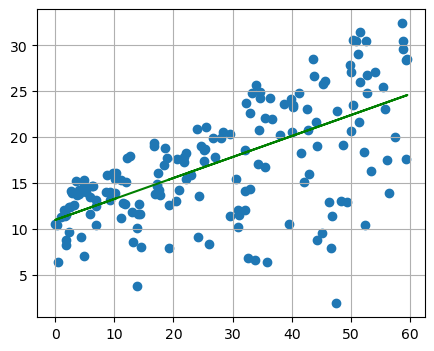

In [74]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.facebook,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_, color='green')

18. Do the same 3 steps for newspaper data: show the correlation, show how well the estimator works, show the fit

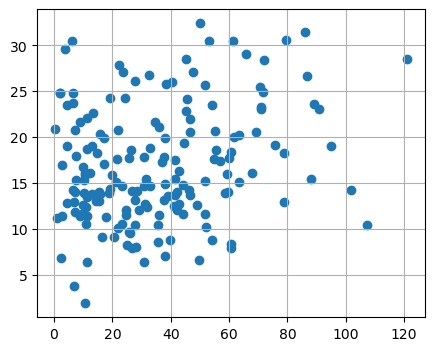

In [75]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.newspaper,d.sales) 

In [76]:
# use newspaper
X = d.newspaper.to_frame()
y = d.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
salesMean = np.mean(d.sales)
print('Root Mean Squared Error:',round(RMSE,2), "or", round(RMSE/salesMean*100), "percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 6.13 or 36 percent error
R^2 value: 0.06


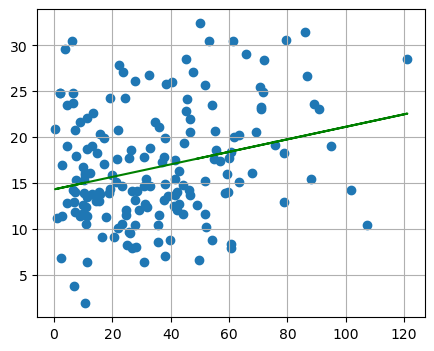

In [77]:
plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(d.newspaper,d.sales)   
plt.plot(X,regr.coef_ * X + regr.intercept_, color='green')

---

### Multiple linear regression

In a multiple linear regression or multivariate linear regression, there are multiple X features that could affect the y output. The steps for multiple linear regression is similar to the steps for simple linear regression. The difference is that we can find out which X features affects the output the most, and the relationship between the X features.

19. We look at a small dataset from `house_prices.csv` (from [source](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data)). The data consists of sales prices of homes with certain features such as area, bedrooms, bathrooms,etc. 

In [98]:
homeprice = pd.read_csv('house_prices.csv') 
print(homeprice.shape)
homeprice

(545, 6)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


20. Set X to the home features, and set y to the price. Print the size of X and y to check.

In [99]:
X = homeprice.drop(columns=['price'])
y = homeprice.price
print(X.shape, y.shape)

(545, 5) (545,)


21. Show the correlation of each feature and price

Text(0, 0.5, 'price')

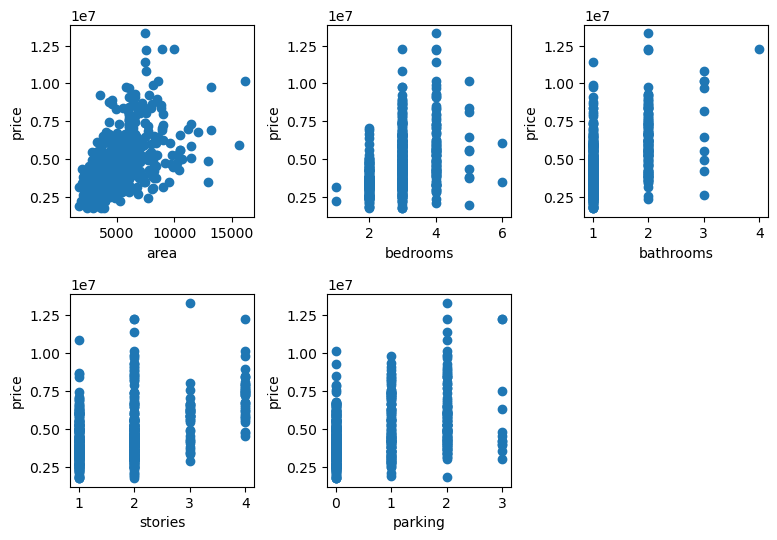

In [100]:
plt.figure(figsize=(9,6))

# Note: the following code shows how each feature is plotted against the price
# The code is repetitive for demo purpose, but ideally should be in a loop.

plt.subplot(2,3,1)   
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.scatter(X.area, y)
plt.xlabel('area')
plt.ylabel('price')

plt.subplot(2,3,2)   
plt.scatter(X.bedrooms, y)
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.subplot(2,3,3)   
plt.scatter(X.bathrooms, y)
plt.xlabel('bathrooms')
plt.ylabel('price')

plt.subplot(2,3,4)   
plt.scatter(X.stories, y)
plt.xlabel('stories')
plt.ylabel('price')

plt.subplot(2,3,5)   
plt.scatter(X.parking, y)
plt.xlabel('parking')
plt.ylabel('price')

There seems to be some correlation for area, bathrooms, stories, and parking, but it's not conclusive.<br>
Compare how scatterplots for categorical data (bathrooms, bedrooms...) differ from scatterplots for continuuous data.

22. Split the X and y into training and testing sets. Print the size of the sets to check.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 5) (408,) (137, 5) (137,)


23. Train the model

In [101]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)

24. Similar to a simple linear regression, the model finds the coefficients for each X attributes.<br>
We can view these coefficients in a DataFrame.

In [102]:
coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
area,3.143693e+02
bedrooms,1.629074e+05
bathrooms,1.274275e+06
stories,5.162671e+05
parking,4.041120e+05


We see that the number of bathrooms has more influence on the price than other areas. We also see that as as each features increases, the price also increases.<br>
It is possible to see negative coefficients. An example feature for the home price dataset that could have negative coefficient is the age of the house. Typically a brand new house costs more than an old house, so as the age of the house increases, the price could be decreasing.

25. Test the estimator and show the accuracy

In [103]:
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 1261675.9 or 26 percent error
R^2 value: 0.56


---

### Decision Tree Regressor

Another regression model is the decision tree. As the name implies, a decision tree is a flow chart that is a tree structure. There is a root note at the top, which branches into 2 child nodes, a left child and right child. Each child node, in turn, branches into 2 more child nodes, until the path reaches a terminal or end node called a leaf node.

Every node holds a test for an X attribute. The result of the test (True or False) determines which of the 2 branches will be selected. The algorithm starts at the root node and traverses down the tree. At each node it tests the X attribute and then takes the resulting path to reach the next child node. When it reaches the leaf node, the value at the leaf node is the output y label.

In [93]:
from sklearn.tree import DecisionTreeRegressor

# use the same X and y as the linear regression model
regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)

In [96]:
y_pred = regr.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 1768580.72 or 37 percent error
R^2 value: 0.76


We see that the decision tree model has a higher accuracy than the linear regression model.

### Sample size

The first dataset that was used (the delivery time dataset) is a simple example of linear regression, but it is not a good case study because the sample size of 21 is much too small. 

There are online resources for looking up or calculating sample sizes for a specific purpose, such as medical applications or social science applications. But there are also some general rule of thumbs for sample sizes. Generally a sample size of 100 is the minimum for small population (or all the population if it's less than 100), or a percent of the population for a larger population. 

Here's an optional, easy-to-read [article](https://tools4dev.org/resources/how-to-choose-a-sample-size/) on determining sample size for basic applications, with links to more in-depth articles for those who are statistically trained.

For machine learning, a training daset is typically larger than one used for statistical sampling. The size of the training data depends on how many X features there are, the type of machine learning model, the subject area, etc. Here's an [article](https://machinelearningmastery.com/much-training-data-required-machine-learning/) that goes over some considerations when determining training datasets.